In [1]:
pip install scikeras[tensorflow] --upgrade --force-reinstall



     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 187.9 kB/s eta 0:00:08
     - -------------------------------------- 0.1/1.5 MB 297.7 kB/s eta 0:00:05
     - -------------------------------------- 0.1/1.5 MB 326.8 kB/s eta 0:00:05
     --- ------------------------------------ 0.1/1.5 MB 409.6 kB/s eta 0:00:04
     --- ------------------------------------ 0.1/1.5 MB 473.7 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.5 MB 513.4 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.5 MB 518.8 kB/s eta 0:00:03
     ------ --------------------------------- 0.2/1.5 MB 514.3 kB/s eta 0:00:03
     ------- -------------------------------- 0.3/1.5 MB 571.2 kB/s eta 0:00:03
     -------- ------------------------------- 0.3/1.5 MB 593.9 kB/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-python-client 2.84.0 requires uritemplate<5,>=3.0.1, which is not installed.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
botocore 1.29.76 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.2.0 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.
python-lsp-server 1.7.2 requires jedi<0.19.0,>=0.17.2, but you have jedi 0.19.1 which is incompatible.
spyder 5.4.3 requires jedi<0.19.0,>=0.17.2, but you have jedi 0.19.1 which is incompatible.


   -- ------------------------------------ 20.4/272.9 MB 208.6 kB/s eta 0:20:11
   -- ------------------------------------ 20.4/272.9 MB 206.5 kB/s eta 0:20:23
   -- ------------------------------------ 20.4/272.9 MB 206.5 kB/s eta 0:20:23
   -- ------------------------------------ 20.4/272.9 MB 204.6 kB/s eta 0:20:35
   -- ------------------------------------ 20.4/272.9 MB 204.6 kB/s eta 0:20:35
   -- ------------------------------------ 20.4/272.9 MB 204.6 kB/s eta 0:20:35
   -- ------------------------------------ 20.4/272.9 MB 204.6 kB/s eta 0:20:35
   -- ------------------------------------ 20.4/272.9 MB 204.6 kB/s eta 0:20:35
   -- ------------------------------------ 20.4/272.9 MB 204.6 kB/s eta 0:20:35
   -- ------------------------------------ 20.4/272.9 MB 204.6 kB/s eta 0:20:35
   -- ------------------------------------ 20.4/272.9 MB 204.6 kB/s eta 0:20:35
   -- ------------------------------------ 20.5/272.9 MB 200.5 kB/s eta 0:21:00
   -- ---------------------------------

In [ ]:
pip install --upgrade adapt


In [ ]:
pip install scikeras[tensorflow]

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

# Reading the data
data = pd.read_csv("PQM_FACTORS.csv")

# Encoding the target variable
le = LabelEncoder()
data["Seriousness"] = le.fit_transform(data["Seriousness"])

# Separating features and target variable
features = data.columns.difference(['Seriousness'])
X = data[features]
Y = data["Seriousness"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating a simple neural network model
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.45))

    # Hidden layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.45))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    # Additional hidden layers (novelty)
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    return model


# Train the model
model=KerasClassifier(model=create_model, epochs=1000, batch_size=64, validation_split=0.2, verbose=True)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],  # Change 'optimizer' to 'model__optimizer'
    'batch_size': [16, 32, 64],               # Change 'batch_size' to 'model__batch_size'
    'epochs': [100, 200, 300]                 # Change 'epochs' to 'model__epochs'
}


# Use GridSearchCV to find the best combination of hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

'''
# Evaluate the model on the test set
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy_nn)
'''

# Display the best hyperparameters and corresponding accuracy
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Accuracy: {grid_result.best_score_}")

Epoch 1/100
80/80 [==============================] - 4s 18ms/step - loss: -273538.6562 - accuracy: 0.0930 - val_loss: -3153276.5000 - val_accuracy: 0.1187
Epoch 2/100
80/80 [==============================] - 1s 13ms/step - loss: -1738424576.0000 - accuracy: 0.0930 - val_loss: -10675788800.0000 - val_accuracy: 0.1187
Epoch 3/100
80/80 [==============================] - 1s 13ms/step - loss: -444150579200.0000 - accuracy: 0.0930 - val_loss: -1868982255616.0000 - val_accuracy: 0.1187
Epoch 4/100
80/80 [==============================] - 1s 14ms/step - loss: -24673083457536.0000 - accuracy: 0.0930 - val_loss: -76221626974208.0000 - val_accuracy: 0.1187
Epoch 5/100
80/80 [==============================] - 1s 13ms/step - loss: -513545649258496.0000 - accuracy: 0.0930 - val_loss: -1269116933505024.0000 - val_accuracy: 0.1187
Epoch 6/100
80/80 [==============================] - 1s 13ms/step - loss: -5463890427117568.0000 - accuracy: 0.0930 - val_loss: -11920034263728128.0000 - val_accuracy: 0.11

KeyboardInterrupt: 

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Embedding, Flatten, Dropout

# Reading the data
data = pd.read_csv("PQM_FACTORS.csv")

# Encoding the target variable
le = LabelEncoder()
data["Seriousness"] = le.fit_transform(data["Seriousness"])

# Separating features and target variable
features = data.columns.difference(['Seriousness'])
X = data[features]
Y = data["Seriousness"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshaping data for Conv1D layer
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Creating a new neural network model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print("New Model Accuracy:", accuracy)


Epoch 1/50
60/60 [==============================] - 5s 20ms/step - loss: -14.1265 - accuracy: 0.0979 - val_loss: -39.5385 - val_accuracy: 0.0958
Epoch 2/50
60/60 [==============================] - 0s 5ms/step - loss: -64.0953 - accuracy: 0.0979 - val_loss: -97.9809 - val_accuracy: 0.0958
Epoch 3/50
60/60 [==============================] - 0s 5ms/step - loss: -129.1681 - accuracy: 0.0979 - val_loss: -176.7960 - val_accuracy: 0.0958
Epoch 4/50
60/60 [==============================] - 0s 5ms/step - loss: -215.2744 - accuracy: 0.0979 - val_loss: -278.5711 - val_accuracy: 0.0958
Epoch 5/50
60/60 [==============================] - 0s 5ms/step - loss: -325.2431 - accuracy: 0.0979 - val_loss: -405.0304 - val_accuracy: 0.0958
Epoch 6/50
60/60 [==============================] - 0s 5ms/step - loss: -456.7430 - accuracy: 0.0979 - val_loss: -554.0420 - val_accuracy: 0.0958
Epoch 7/50
60/60 [==============================] - 0s 6ms/step - loss: -624.2604 - accuracy: 0.0979 - val_loss: -729.6317 - va

Epoch 1/1000
38/38 [==============================] - 4s 31ms/step - loss: 2.3038 - accuracy: 0.1071 - val_loss: 2.3019 - val_accuracy: 0.0967
Epoch 2/1000
38/38 [==============================] - 1s 21ms/step - loss: 2.3026 - accuracy: 0.1071 - val_loss: 2.2996 - val_accuracy: 0.1183
Epoch 3/1000
38/38 [==============================] - 1s 20ms/step - loss: 2.3003 - accuracy: 0.1171 - val_loss: 2.2966 - val_accuracy: 0.1133
Epoch 4/1000
38/38 [==============================] - 1s 21ms/step - loss: 2.2973 - accuracy: 0.1187 - val_loss: 2.2967 - val_accuracy: 0.1200
Epoch 5/1000
38/38 [==============================] - 1s 20ms/step - loss: 2.2913 - accuracy: 0.1167 - val_loss: 2.2864 - val_accuracy: 0.1217
Epoch 6/1000
38/38 [==============================] - 1s 21ms/step - loss: 2.2874 - accuracy: 0.1275 - val_loss: 2.2802 - val_accuracy: 0.1283
Epoch 7/1000
38/38 [==============================] - 1s 21ms/step - loss: 2.2828 - accuracy: 0.1187 - val_loss: 2.2936 - val_accuracy: 0.1233

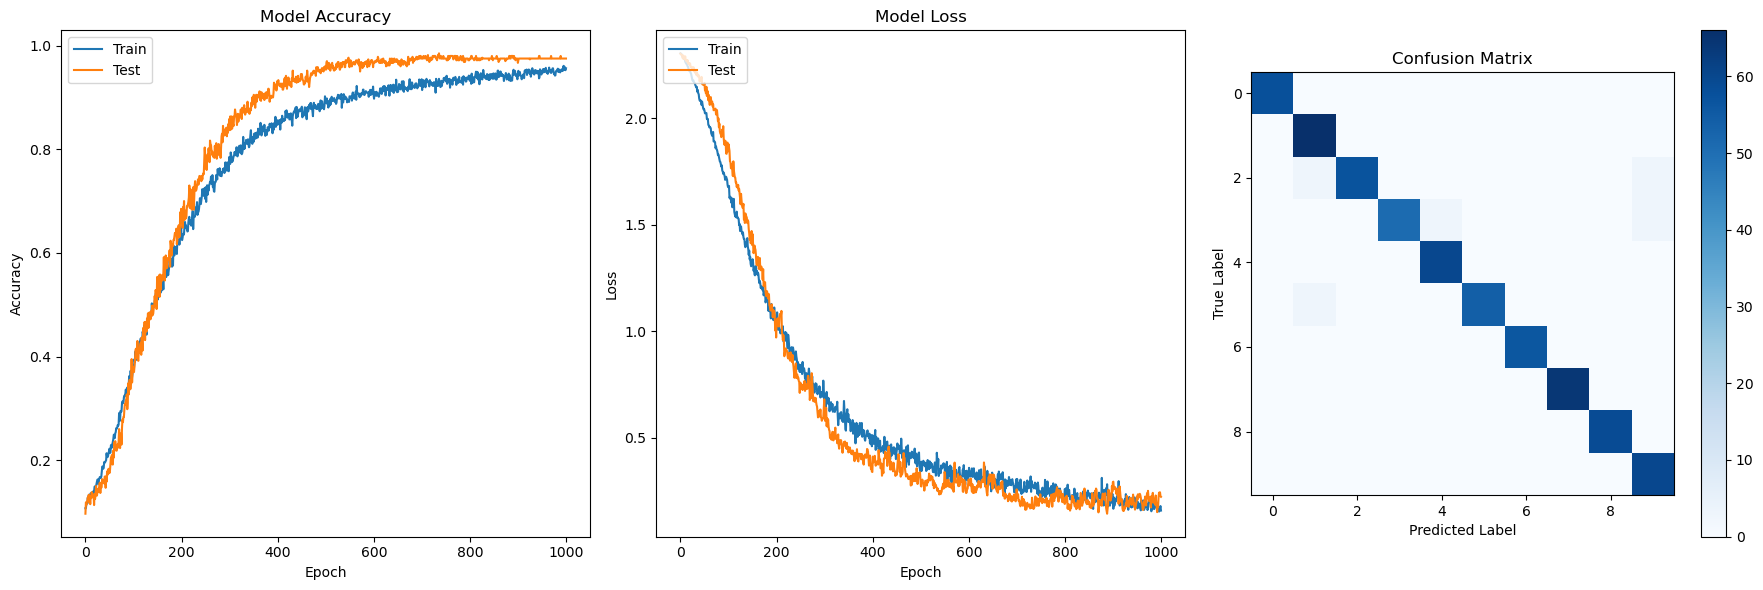

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Reading the data
data = pd.read_csv("PQM_FACTORS.csv")

# Separating features and target variable
features = data.columns.difference(['Seriousness'])
X = data[features]
Y = pd.get_dummies(data["Seriousness"])  # One-hot encode the target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a more complex ANN model with changed architecture
model = Sequential()

# Input layer
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.45))

# Hidden layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.45))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Additional hidden layers (novelty)
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), verbose = True)

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(np.array(y_test), axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Plot training history
plt.figure(figsize=(18, 6))

# Plot training & validation accuracy values
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

# Confusion Matrix
plt.subplot(1, 3, 3)
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test.values, axis=1), y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()